In [1]:
import json
from transformers import Qwen2TokenizerFast
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
tokenizer = Qwen2TokenizerFast.from_pretrained("Qwen/Qwen3-1.7B")

Mean token count: 195.83
Median token count: 115.0
Min token count: 1
Max token count: 768


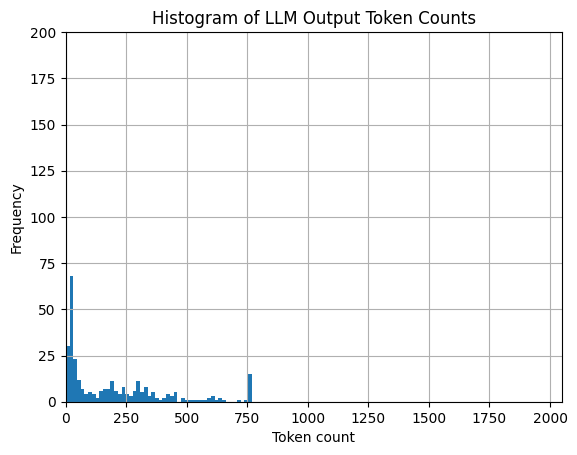

In [3]:
# For each JSON object, get the LLM output in the field "student_output".
# Then tokenize the output using Qwen2TokenizerFast and count the number of tokens.
# Report the mean, median, min, and max number of tokens across all outputs.

run_name = "run14"

with open(f"eval_results_{run_name}/test_student_results_full.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

token_counts = []
for item in data:
    output = item["student_output"]
    tokens = tokenizer.tokenize(output)
    token_counts.append(len(tokens))

print("Mean token count:", np.mean(token_counts))
print("Median token count:", np.median(token_counts))
print("Min token count:", np.min(token_counts))
print("Max token count:", np.max(token_counts))

# Plot a histogram of the token counts
plt.hist(token_counts, bins=50)
plt.xlabel("Token count")
plt.ylabel("Frequency")
plt.xlim(0, 2048)
plt.ylim(0, 200)
plt.title("Histogram of LLM Output Token Counts")
plt.grid()
plt.show()

In [4]:
# print the indices (in the list) and the "index" field of entries with tokens > X

for i, count in enumerate(token_counts):
    if count > 1024:
        print(
            f"Line no: {i + 1}, Entry index: {data[i]['index']}, Token count: {count}, Task: {data[i]['task']}"
        )

Mean request latency (s): 117.02989795918367
Median request latency (s): 102.905
Min request latency (s): 0.8
Max request latency (s): 416.63


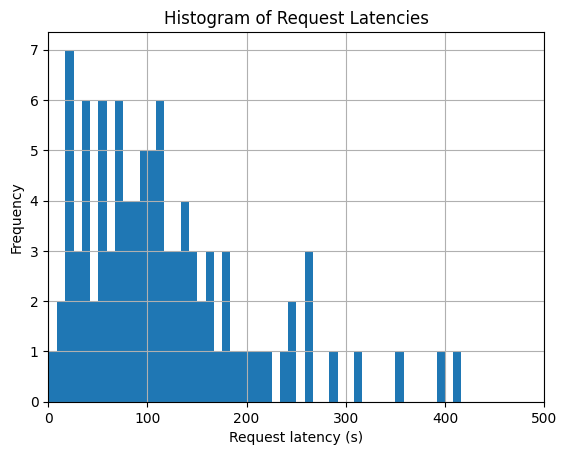

In [5]:
# Compute average request latency
# the log file has entires like these:
"""
[t=1146.54s] Completed batch 85 (duration: 121.56s, status: 200)
[t=1151.66s] Sending batch 97 (scheduled: 1151.66s, size: 3)
[t=1161.45s] Completed batch 93 (duration: 42.66s, status: 200)
[t=1174.40s] Completed batch 90 (duration: 67.20s, status: 200)
[t=1175.64s] Completed batch 92 (duration: 60.67s, status: 200)
"""
# Parse this and print stats/histogram like above

with open(f"../request/{run_name}.log", "r") as f:
    log_lines = f.readlines()

durations = []
for line in log_lines:
    match = re.search(r"Completed batch \d+ \(duration: ([\d.]+)s, status: 200\)", line)
    if match:
        duration = float(match.group(1))
        durations.append(duration)

print("Mean request latency (s):", np.mean(durations))
print("Median request latency (s):", np.median(durations))
print("Min request latency (s):", np.min(durations))
print("Max request latency (s):", np.max(durations))

# Plot a histogram of the request latencies
plt.hist(durations, bins=50)
plt.xlabel("Request latency (s)")
plt.ylabel("Frequency")
plt.xlim(0, 500)
# plt.ylim(0, 21)
plt.title("Histogram of Request Latencies")
plt.grid()
# save fig dpi 250
# plt.savefig(f"request_latencies_{run_name}.pdf", dpi=250)
plt.show()